### A Spam Classifier based on Naive Bayes 

We are using **sklearn.naive_bayes** to train a spam classifier! We use a set of emails containing ham and spam to build and train our model. The data is rather limited, only 3000 emails, with two sets pregrouped into spam, 500 emails, and ham, 2500 emails.<br><br>
Sources:<br> http://cswww.essex.ac.uk/staff/poesio/Teach/807/Labs/Lab3/data/easy_ham/<br>
http://cswww.essex.ac.uk/staff/poesio/Teach/807/Labs/Lab3/data/spam/<br><br>
The method is called *naive* because we're asuming there's no relationships between the words themselves. We're looking at each word in isolation, individually within a message, and basically combining all the probabilities of each word's contribution to being spam or not. A better spam classifier would obviously be looking at the relationships between the words.<br>
<br>The analysis consists of the following steps.
-  I. Importing necessary libraries 
- II. Finding the files in the directory and separating the message part in each email
- III. Creating two directories; one for spam, one for ham
- IV. Adding a column to the dataframes showing the length in number of words of each email
- V. Viewing the data in three data frames; all emails, spam and ham
- VI. Separating the data into Train and Test sets and looking at the results with various splits 80/20, 70/30, 60/40 and 10/90
- VII. Viewing the sizes of the emails in histograms
- VIII. Viewing at the statistics of the different data sets
- IX. Conclusions

In [2]:
%matplotlib inline 
import os
import io
import numpy
import pandas as pd
from statistics import mean #for mean
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

#Import statistics as this will be used calulating the averages of the predictions with diff. Train/Tests

C:\Users\jangn\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The *readFiles* function uses *os.walk(path)* to find all the files in the directory. Then, starting from line *inBody = False*  a pathname is built for each individual file in that directory. The line *elif line ==  '\n:* ensures we view the actual message in each email, starting after the first empty line.

In [3]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path): 
        #os.walk(path) finds all the files in the directory. os.walk() is a built-in function generating the file names in a directory tree
        
        for filename in filenames:
            path = os.path.join(root, filename)
            
            #The following 11 lines of code build a pathname for each file and reads it in: message+path
            inBody = False 
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n': #Shows that the actual message starts after the first empty line
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message

The *dataFrameFromDirectory* function below creates a dictionary with the *Message* as the *Keys* and its *Classification* as the *Values*. 
We then call two methods *append()* and *dataFrameFromDirectory* to throw into the DataFrame all the spam from the spam folder and al the ham from the ham folder.

In [4]:
def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []}) 
#Creates a dictionary containing the message itself and its class, spam or ham

data = data.append(dataFrameFromDirectory('c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham', 'ham'))
#The two methods above - append and dataFrameFromDirectory - throw into the DataFrame all spams and hams from the folders 

spam_emails = DataFrame({'message': [], 'class': []})
spam_emails = spam_emails.append(dataFrameFromDirectory('c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam', 'spam'))

ham_emails = DataFrame({'message': [], 'class': []})
ham_emails = ham_emails.append(dataFrameFromDirectory('c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham', 'ham'))

Next, we add a new column 'length' to the dataframe, enabling us to make various comparison graphs of the emails' contents. 

In [5]:
data.groupby('message').describe()
#Groups the data by the 'message' column

data['length'] = data['message'].map(lambda text: len(text)) 
#adds column 'length' to the DataFrame. 
#A lambda definition can be put anywhere a function is expected. It doesn't need to be assigned to a variable.

spam_emails.groupby('message').describe()
spam_emails['length'] = spam_emails['message'].map(lambda text: len(text))

ham_emails.groupby('message').describe()
ham_emails['length'] = ham_emails['message'].map(lambda text: len(text))

Next, we look at the dataframes for the entire data set, the spam data and the ham data.

In [6]:
data.head()
#data.sort_values(by = ['class', 'length'], ascending = True)

,class,message,length
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",3966
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,820
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,669
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...,3004
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...,687


In [7]:
spam_emails.head()
#spam_emails.sort_values(by = ['class', 'length'], ascending = True)

,class,message,length
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",3966
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,820
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,669
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...,3004
c:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...,687


In [8]:
ham_emails.head()
#ham_emails.sort_values(by = ['class', 'length'], ascending = True)

,class,message,length
c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham\00001.7c53336b37003a9286aba55d2945844c,ham,"Date: Wed, 21 Aug 2002 10:54:46 -05...",1653
c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham\00002.9c4069e25e1ef370c078db7ee85ff9ac,ham,"Martin A posted:\n\nTassos Papadopoulos, the G...",924
c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham\00003.860e3c3cee1b42ead714c5c874fe25f7,ham,Man Threatens Explosion In Moscow \n\n\n\nThur...,1788
c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham\00004.864220c5b6930b209cc287c361c99af1,ham,Klez: The Virus That Won't Die\n\n \n\nAlready...,1158
c:/Users/jangn/CODE/sundog_DataScience/DataScience/DataScience-Python3/emails/ham\00005.bf27cdeaf0b8c4647ecd61b1d09da613,ham,"> in adding cream to spaghetti carbonara, whi...",1082


To see how well our classifier works, we split the data into Train and Test sets, starting with 80% Train, 20% Test -split. The printout shows the split in number of emails and columns for each data set.

In [9]:
trainData, testData = train_test_split(data, test_size = 0.20) 
#A function in scikit learn splitting your data into random train and test subsets

print (trainData.shape, testData.shape, data.shape) 
#Shows number of data points in each set and nr of columns = 2; class & message

(2400, 3) (600, 3) (3000, 3)


To perform Naive Bayes on the data we have we use MultinomialNB() function from scikit-learn. <br>Since we split the data into a Train and Test set, the vectorizer- and classifier -part below is for the Training data. 

In [10]:
trainDatavectorizer = CountVectorizer() 
#Converts a collection of text docs into a matrix of token counts/numericals.

trainDatacounts = trainDatavectorizer.fit_transform(trainData['message'].values) 
#Makes the words in emails into numbers and then lists the number of times each word occurs in the email
#trainvectorizer.fit_transform converts individual words into numbers/values
#fit_transform() is a function calibrating your measurement so, that training data and test data have similar shape

trainDataclassifier = MultinomialNB()
trainDatatargets = trainData['class'].values 
#data on which emails in the file are spam and ham

trainDataclassifier.fit(trainDatacounts, trainDatatargets)
#creates a model using NB predicting if new email id spam or ham, based on info we've given it!

#print(trainDatatargets) # Not activated here, but shows a list 0f which class each message belongs to
#print(trainDatacounts) #Not activated here, but 1st nr is the nth email in Train data (=2999 emails total), 
#2nd is the code given to a word, 3rd is the frequency of this word in the email. 


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Next, also the Test data is "vectorized". 

In [11]:
from sklearn import metrics

testDatacounts = trainDatavectorizer.transform(testData['message'].values)
#transforms messages to list of words and their frequencies in message

testDatapredictions = trainDataclassifier.predict(testDatacounts) 
#predict() function on classifier to see if result spam or ham

tdr = [(metrics.accuracy_score(testData['class'].values,testDatapredictions))]
#Shows the accuracy of the model to recognize spam in the Test data set, on a scale of 0-1.

print (tdr) #These results after running this cell were added to the four train_test_ -lists to get the line graphics below.

[0.95333333333333337]


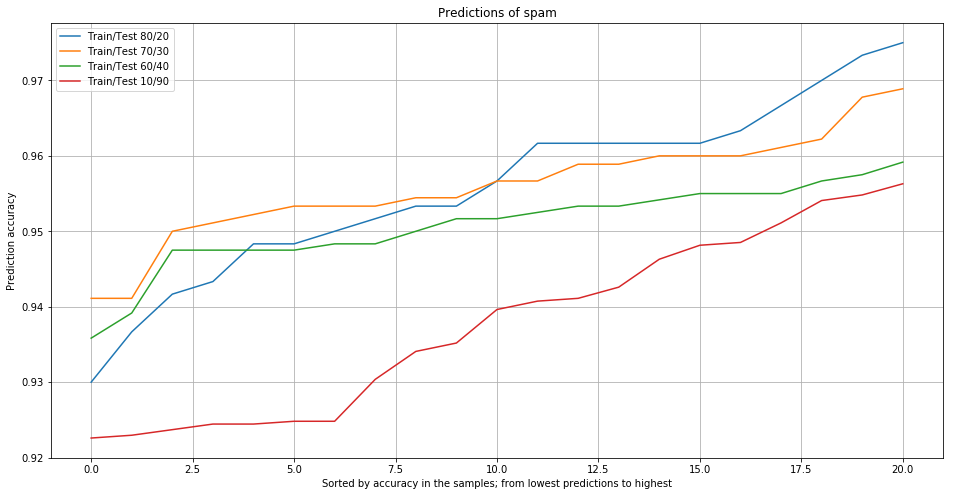

In [147]:

train_test_8020 = [0.95, 0.948333333333, 0.943333333333, 0.953333333333, 0.975, 0.961666666667, 0.948333333333, 0.97, 0.951666666667, 0.961666666667,0.956666666667, 0.941666666667, 0.973333333333, 0.961666666667, 0.966666666667, 0.936666666667, 0.963333333333, 0.953333333333, 0.93, 0.961666666667,  0.961666666667]
train_test_8020.sort()

train_test_7030 = [0.95, 0.961111111111, 0.956666666667, 0.96, 0.951111111111, 0.96, 0.962222222222, 0.953333333333, 0.954444444444, 0.96, 0.941111111111,0.954444444444,  0.958888888889,  0.953333333333, 0.953333333333, 0.956666666667, 0.958888888889, 0.941111111111, 0.967777777778, 0.968888888889, 0.952222222222]
train_test_7030.sort()

train_test_6040 = [0.953333333333, 0.953333333333, 0.935833333333, 0.955, 0.955, 0.948333333333, 0.951666666667, 0.9525, 0.951666666667, 0.95 , 0.956666666667, 0.9475, 0.954166666667, 0.939166666667, 0.9475, 0.948333333333, 0.955, 0.9575, 0.9475, 0.9475, 0.959166666667  ]
train_test_6040.sort()

train_test_1090 = [0.924444444444,  0.956296296296, 0.948148148148, 0.941111111111 ,0.948518518519, 0.946296296296, 0.924814814815, 0.923703703704, 0.922592592593,   0.951111111111, 0.924814814815, 0.924444444444,0.942592592593, 0.954074074074, 0.935185185185, 0.922962962963, 0.93037037037, 0.934074074074, 0.940740740741, 0.93962962963 , 0.954814814815 ]
train_test_1090.sort();

plt.plot(train_test_8020)
plt.plot(train_test_7030)
plt.plot(train_test_6040)
plt.plot(train_test_1090)
plt.legend(['Train/Test 80/20', 'Train/Test 70/30', 'Train/Test 60/40', 'Train/Test 10/90'], loc=2)
plt.xlabel('Sorted by accuracy in the samples; from lowest predictions to highest')
plt.ylabel('Prediction accuracy')
plt.title('Predictions of spam')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 8.0
plt.rcParams["figure.figsize"] = fig_size
plt.grid(True)
plt.show();


Show averages of prediction accuracies

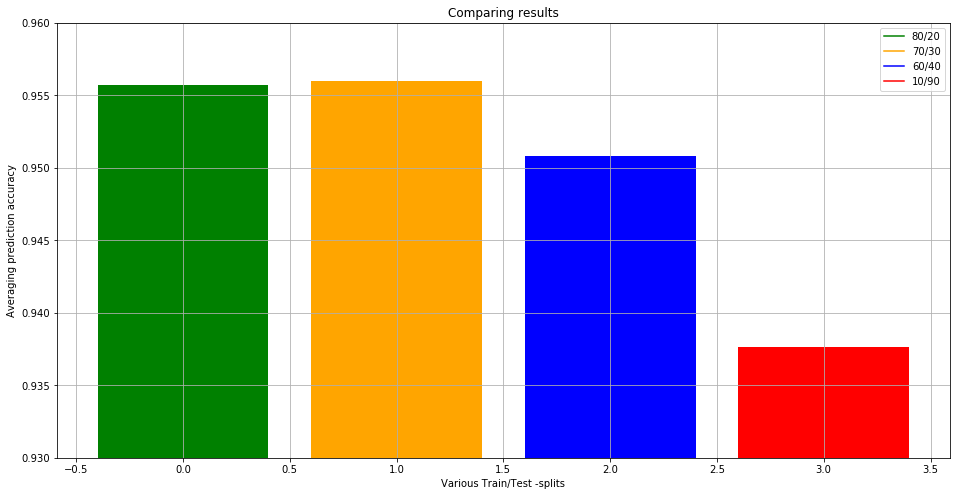

In [13]:
avg_8020 = mean(train_test_8020)
avg_7030 = mean(train_test_7030)
avg_6040 = mean(train_test_6040)
avg_1090 = mean(train_test_1090)

Avg_predictions = [avg_8020, avg_7030, avg_6040, avg_1090]
colors = ['green', 'orange', 'blue', 'red']

axes = plt.axes()
#axes.set_xlim([0,1])
axes.set_ylim([0.93, 0.96])
#axes.set_xticks([])

plt.plot(avg_8020,'green')
plt.plot(avg_7030, 'orange')
plt.plot(avg_6040, 'blue')
plt.plot(avg_1090, 'red')
plt.legend(['80/20', '70/30', '60/40', '10/90'], loc=1)
plt.xlabel('Various Train/Test -splits')
plt.ylabel('Averaging prediction accuracy')
plt.title('Comparing results')
my_xticks = ['70/30', '60/40', '10/90',]
#plt.xticks(x,my_xticks)

fig_size = plt.rcParams["figure.figsize"] #gets current size
 
#print (fig_size) #print the current size, then set your own width (below)

fig_size[0] =16.0
fig_size[1] = 6.0
plt.rcParams["figure.figsize"] = fig_size

plt.bar(range(0,4), Avg_predictions, color = colors)
plt.grid(True)
plt.show()

Aggregate statistics:

Next, Histograms showing the lengths in words of the emails; all, spam and ham. <br>**Please note!** Biggest outliers, i.e. message sizes 10.000+ words, have been omitted to preserve readability.

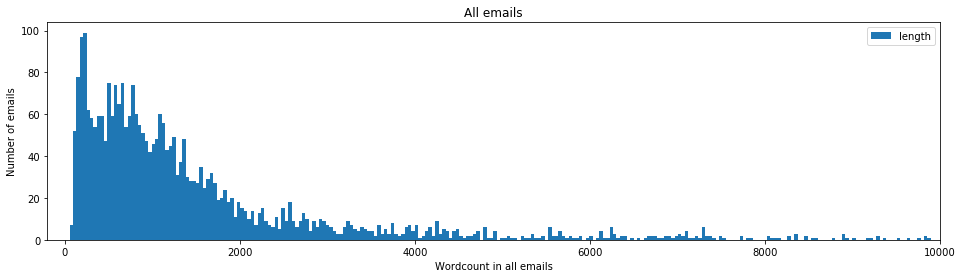

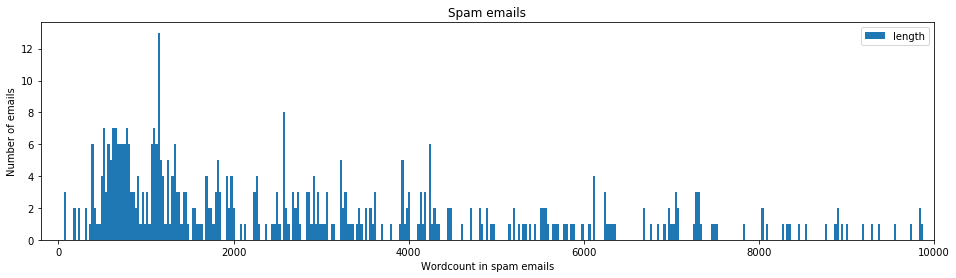

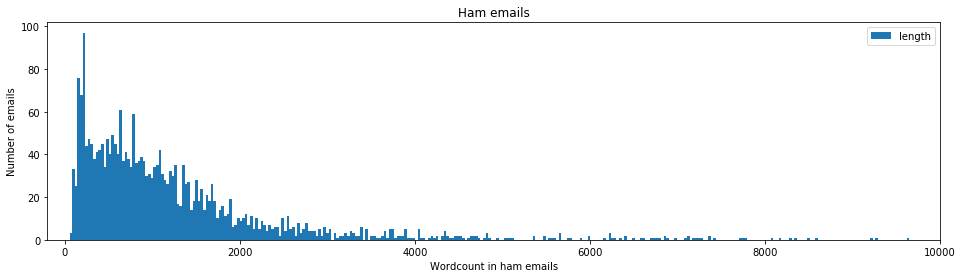

In [148]:
fig_size[0] =16.0
fig_size[1] = 4.0
plt.rcParams["figure.figsize"] = fig_size;

data.plot(bins=6000, kind='hist')
plt.title('All emails')
axes=plt.axes()
axes.set_xlim([-200,10000]);
plt.xlabel('Wordcount in all emails')
plt.ylabel('Number of emails')

spam_emails.plot(bins=9000, kind='hist')
plt.title('Spam emails')
axes=plt.axes()
axes.set_xlim([-200,10000]);
plt.xlabel('Wordcount in spam emails')
plt.ylabel('Number of emails')

ham_emails.plot(bins=3000, kind= 'hist')
plt.title('Ham emails')
axes=plt.axes()
axes.set_xlim([-200,10000]);
plt.xlabel('Wordcount in ham emails')
plt.ylabel('Number of emails');

In [118]:
data2=data.length.describe()
print(data2)
df_data= pd.DataFrame(data2[0:7]) # let's leave 'max' out from data frame to avoid distortion in the graph
df_data.columns = ['all emails']
#df_data.head(7)


count      3000.000000
mean       2196.253333
std        7378.845770
min          54.000000
25%         526.000000
50%        1025.000000
75%        1857.000000
max      234358.000000
Name: length, dtype: float64


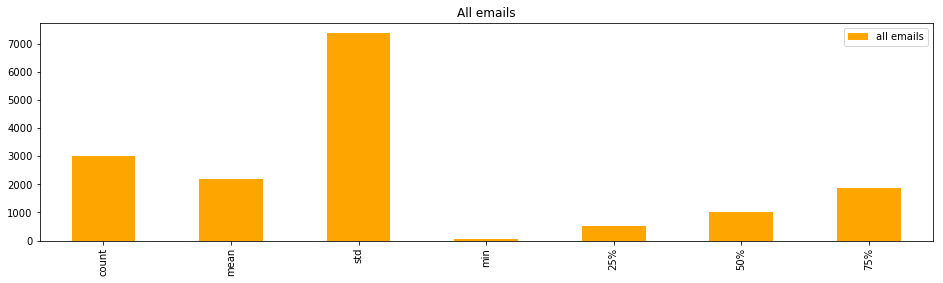

In [138]:
df_data.plot( kind="bar", title='All emails',
                 figsize=(16,4), color='orange',
                 stacked=True);

In [141]:
spam2=spam_emails.length.describe()
print(spam2)
df_spam2= pd.DataFrame(spam2[0:7]) # let's leave 'max' out from data frame to avoid distortion in the graph
df_spam2.columns = ['spam']
#df_spam2.head(7)

count       500.000000
mean       5746.968000
std       15861.429791
min          65.000000
25%        1082.000000
50%        2578.500000
75%        5619.750000
max      234358.000000
Name: length, dtype: float64


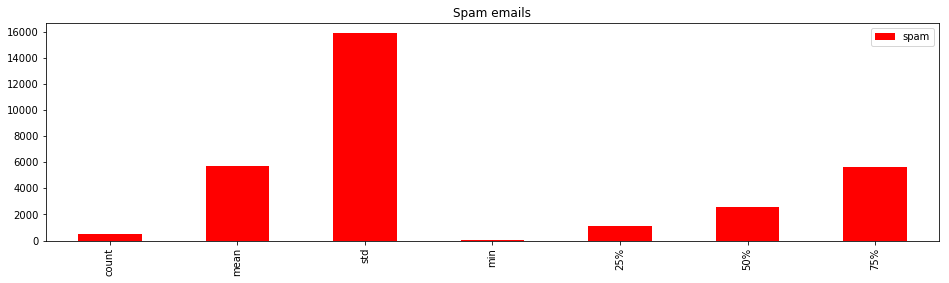

In [142]:
df_spam2.plot( kind="bar", title='Spam emails',
                 figsize=(16,4), color='red',
                 stacked=True);

In [143]:
ham2=ham_emails.length.describe()
print(ham2)
df_ham2= pd.DataFrame(ham2[0:7]) # let's leave 'max' out from data frame to avoid distortion in the graph
df_ham2.columns = ['ham']
#df_ham2.head(7)

count     2500.000000
mean      1486.110400
std       3475.300719
min         54.000000
25%        459.750000
50%        899.000000
75%       1567.500000
max      89733.000000
Name: length, dtype: float64


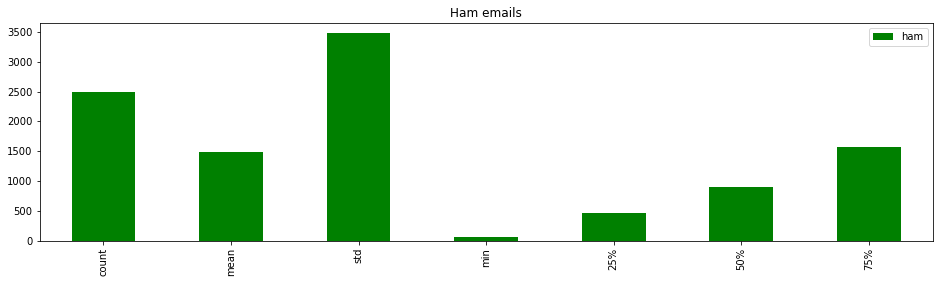

In [145]:
df_ham2.plot( kind="bar", title='Ham emails',
                 figsize=(16,4), color='green',
                 stacked=True);

Let's combine all graphs of email lengths into one combined.  

In [114]:
frames = [df_data, df_spam2, df_ham2]
result = pd.concat(frames, axis=1) # without 'axis=1' dataframes are on top of each other, not next to each other
#print(result)
df_combined = pd.DataFrame(result)

df_combined.head(21)

,all emails,spam,ham
count,3000.000000,500.000000,2500.000000
mean,2196.253333,5746.968000,1486.110400
std,7378.845770,15861.429791,3475.300719
min,54.000000,65.000000,54.000000
25%,526.000000,1082.000000,459.750000
50%,1025.000000,2578.500000,899.000000
75%,1857.000000,5619.750000,1567.500000


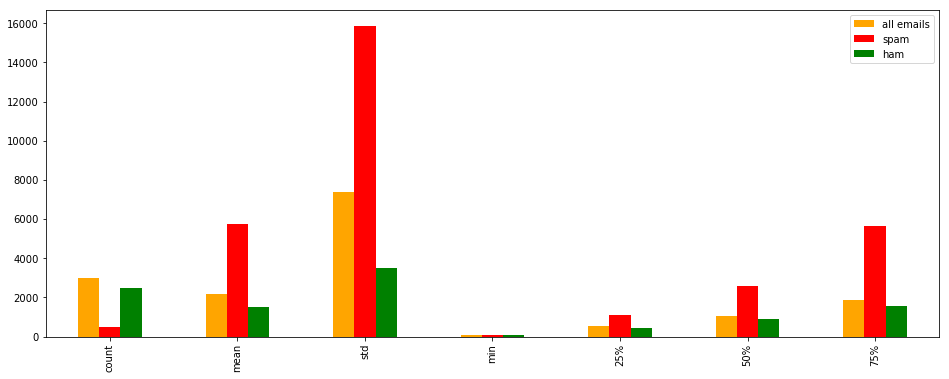

In [110]:
df_combined.plot( kind="bar", 
                 figsize=(16,6),color=['orange','red','green'],
                 stacked=False);

## Conclusions
Our data set is small, so our spam classifier isn't actually very good. Around 95% success rate at best filering out the spam. Even cutting the training data to only 10% of the emails (300), the success rate fell only by a couple of percentage points. A larger data set would be needed to put the classifier to a real test.<br><br>
Analysing the sizes of the emails might also reveal more with a larger data set. Are spam emails on average longer (*mean*) and with a wider variation in their sizes (*std*)? At least this is what our data seems to indicate. If so, perhaps these features could be useful in classifying emails with larger data samples?